# Predicción de Número de Ciber-ataques

- Autor: Christian Julca
- Fecha Creación: 18/08/2021
- Unidad: Equipo de Gestión de Información

Descripción: Predicción mensual del número de ataques cibernéticos para un horizonte de 6 meses

## I. Instalación de librerías

In [200]:
#pip install sklearn
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import r2_score

## II. Ingesta y preparación de Datos

In [205]:
df = pd.read_csv('../data/Cantidad total de ataques.csv', encoding='latin', sep=';')

mes= ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Setiembre', 
      'Octubre', 'Noviembre', 'Diciembre']
i = 1
df['time'] = df['Mes']
for m in mes: 
    df['time'] = np.where(df['Mes']==m, i, df['time'])
    i=i+1

df['time2'] = df['time'].astype(str)+'/'+df['Año'].astype(str)
df['date'] = pd.to_datetime(df['time2'], format='%m/%Y')
df['Cantidad'] = df['Cantidad'].str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Año       55 non-null     int64         
 1   Mes       55 non-null     object        
 2   Cantidad  55 non-null     float64       
 3   time      55 non-null     object        
 4   time2     55 non-null     object        
 5   date      55 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [206]:
df.set_index('date', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2021-07-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Año       55 non-null     int64  
 1   Mes       55 non-null     object 
 2   Cantidad  55 non-null     float64
 3   time      55 non-null     object 
 4   time2     55 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [207]:
df.shape

(55, 5)

In [208]:
df.head()

,Año,Mes,Cantidad,time,time2
date,,,,,
2021-07-01,2021,Julio,30465719.0,7,7/2021
2021-06-01,2021,Junio,25297296.0,6,6/2021
2021-05-01,2021,Mayo,71872869.0,5,5/2021
2021-04-01,2021,Abril,59253310.0,4,4/2021
2021-03-01,2021,Marzo,29737085.0,3,3/2021


## III. Visualización de datos - Outliers

<AxesSubplot:xlabel='date'>

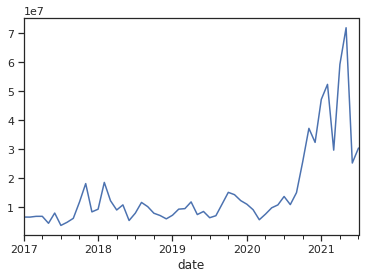

In [209]:
fig, ax = plt.subplots();
df['Cantidad'].plot(ax=ax)

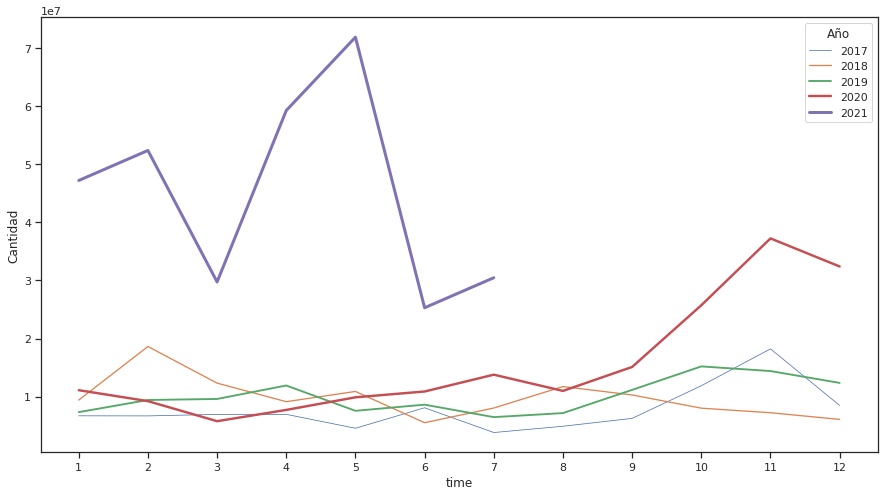

In [235]:
f, axx2 = plt.subplots(figsize=(15,8))
axx2 = sns.lineplot(x='time', y='Cantidad', hue='Año', data=df, 
                       palette='deep', size='Año')
axx2.set_xticks(np.arange(1,13,1))

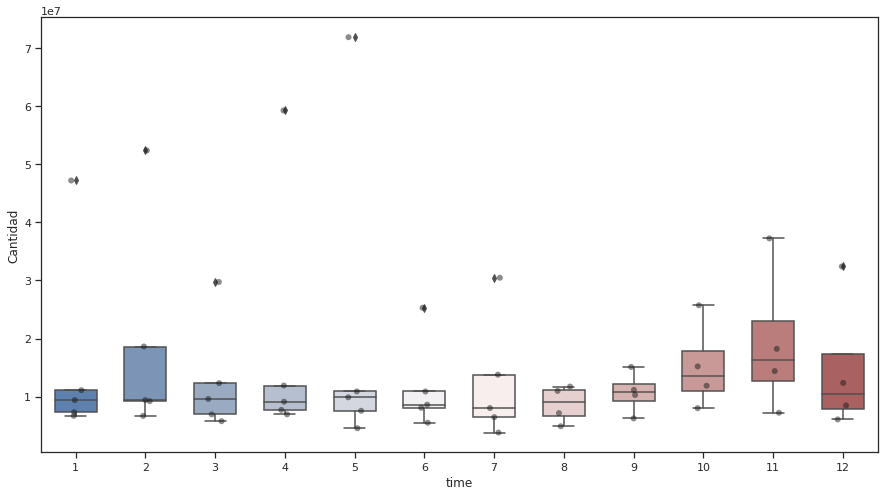

In [211]:
sns.set_theme(style='ticks')
f, axx = plt.subplots(figsize=(15,8))

axx = sns.boxplot(x='time', y='Cantidad', data=df, width=.6, palette='vlag')
axx = sns.stripplot(x='time', y='Cantidad', data=df, size=6, color='.1', linewidth=0, alpha=0.5)

In [212]:
d_or = df.reset_index()
d_or = d_or[['date', 'Cantidad']]
d_or.columns=['date', 'yreal']
d_or.head()

,date,yreal
0,2021-07-01,30465719.0
1,2021-06-01,25297296.0
2,2021-05-01,71872869.0
3,2021-04-01,59253310.0
4,2021-03-01,29737085.0


In [213]:
ddf = df.reset_index()
ddf = ddf[['date', 'Cantidad']]
ddf.columns=['ds','y']
ddf.head()

,ds,y
0,2021-07-01,30465719.0
1,2021-06-01,25297296.0
2,2021-05-01,71872869.0
3,2021-04-01,59253310.0
4,2021-03-01,29737085.0


In [214]:
#outliers
ddf.loc[ddf['ds'] == '2021-05-01', 'y'] = None
ddf.loc[ddf['ds'] == '2021-04-01', 'y'] = None

In [215]:
ddf.head(12)

,ds,y
0,2021-07-01,30465719.0
1,2021-06-01,25297296.0
2,2021-05-01,NaN
3,2021-04-01,NaN
4,2021-03-01,29737085.0
5,2021-02-01,52375118.0
6,2021-01-01,47204974.0
7,2020-12-01,32401534.0
8,2020-11-01,37235688.0
9,2020-10-01,25727487.0


## IV. Modelamiento

In [216]:
#modelling basado en Prophet (ver en referencias) y ajuste
m = Prophet()
m.fit(ddf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -63.7073
Iteration  1. Log joint probability =   -2.19715. Improved by 61.5101.
Iteration  2. Log joint probability =    53.9763. Improved by 56.1734.
Iteration  3. Log joint probability =    68.1077. Improved by 14.1315.
Iteration  4. Log joint probability =    82.2193. Improved by 14.1116.
Iteration  5. Log joint probability =    82.2397. Improved by 0.0203726.
Iteration  6. Log joint probability =    82.2423. Improved by 0.00257706.
Iteration  7. Log joint probability =    82.2436. Improved by 0.00129082.
Iteration  8. Log joint probability =    82.5235. Improved by 0.279932.
Iteration  9. Log joint probability =    82.6217. Improved by 0.0981959.
Iteration 10. Log joint probability =    83.1343. Improved by 0.512593.
Iteration 11. Log joint probability =    83.1544. Improved by 0.0200883.
Iteration 12. Log joint probability =    83.1729. Improved by 0.0185562.
Iteration 13. Log joint probability =    83.2757. Improved by 0.102771.
Iteration 14. Log j

In [217]:
#dates futuros que para predecir
future = m.make_future_dataframe(periods=6, freq='M')
future.tail(7)

,ds
54,2021-07-01
55,2021-07-31
56,2021-08-31
57,2021-09-30
58,2021-10-31
59,2021-11-30
60,2021-12-31


In [218]:
#predicción sobre todo el horizonte incluído el futuro
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
54,2021-07-01,2.429139e+07,1.610255e+07,3.190808e+07
55,2021-07-31,2.408056e+07,1.572385e+07,3.214607e+07
56,2021-08-31,3.198232e+07,2.377477e+07,4.043960e+07
57,2021-09-30,3.410566e+07,2.557038e+07,4.179220e+07
58,2021-10-31,2.918128e+07,2.110803e+07,3.766559e+07
59,2021-11-30,3.338650e+07,2.506982e+07,4.151396e+07
60,2021-12-31,2.117930e+07,1.276362e+07,2.994163e+07


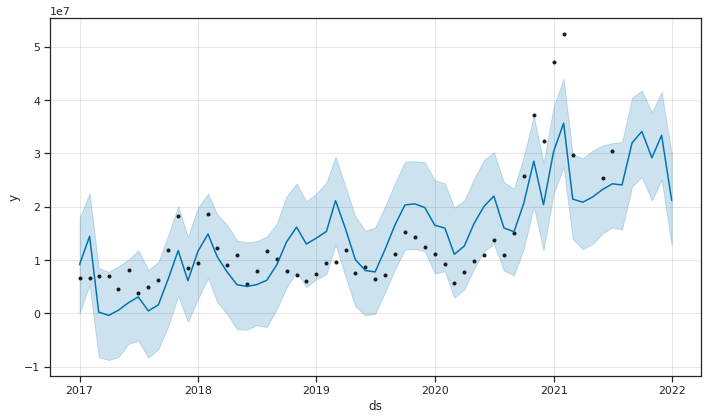

In [219]:
#predicción (línea), bandas de predicción (área) y valor real (punto)
fig = m.plot(forecast)

In [220]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-1.708849e+06,1.637401e+04,1.788565e+07,-1.708849e+06,-1.708849e+06,1.085076e+07,1.085076e+07,1.085076e+07,1.085076e+07,1.085076e+07,1.085076e+07,0.0,0.0,0.0,9.141912e+06
1,2017-02-01,-1.260149e+06,5.319585e+06,2.253584e+07,-1.260149e+06,-1.260149e+06,1.572189e+07,1.572189e+07,1.572189e+07,1.572189e+07,1.572189e+07,1.572189e+07,0.0,0.0,0.0,1.446174e+07
2,2017-03-01,-8.548726e+05,-8.183198e+06,8.522386e+06,-8.548726e+05,-8.548726e+05,1.084571e+06,1.084571e+06,1.084571e+06,1.084571e+06,1.084571e+06,1.084571e+06,0.0,0.0,0.0,2.296980e+05
3,2017-04-01,-4.061733e+05,-8.742927e+06,7.762187e+06,-4.061733e+05,-4.061733e+05,4.161018e+04,4.161018e+04,4.161018e+04,4.161018e+04,4.161018e+04,4.161018e+04,0.0,0.0,0.0,-3.645631e+05
4,2017-05-01,2.805186e+04,-8.184280e+06,8.839061e+06,2.805186e+04,2.805186e+04,5.702582e+05,5.702582e+05,5.702582e+05,5.702582e+05,5.702582e+05,5.702582e+05,0.0,0.0,0.0,5.983101e+05


In [221]:
print("N de observaciones con forecast:", forecast.shape)
print("N de Observaciones sin forecast", d_or.shape)

N de observaciones con forecast: (61, 16)
N de Observaciones sin forecast (55, 2)


In [222]:
final = pd.merge(left=forecast, right=d_or, left_on='ds', right_on='date', how='left')
final = final[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'yhat', 'yreal' ]]
print(final.shape)
final.head()

(61, 6)


,ds,trend,yhat_lower,yhat_upper,yhat,yreal
0,2017-01-01,-1.708849e+06,1.637401e+04,1.788565e+07,9.141912e+06,6698118.0
1,2017-02-01,-1.260149e+06,5.319585e+06,2.253584e+07,1.446174e+07,6681549.0
2,2017-03-01,-8.548726e+05,-8.183198e+06,8.522386e+06,2.296980e+05,6942669.0
3,2017-04-01,-4.061733e+05,-8.742927e+06,7.762187e+06,-3.645631e+05,6949022.0
4,2017-05-01,2.805186e+04,-8.184280e+06,8.839061e+06,5.983101e+05,4555668.0


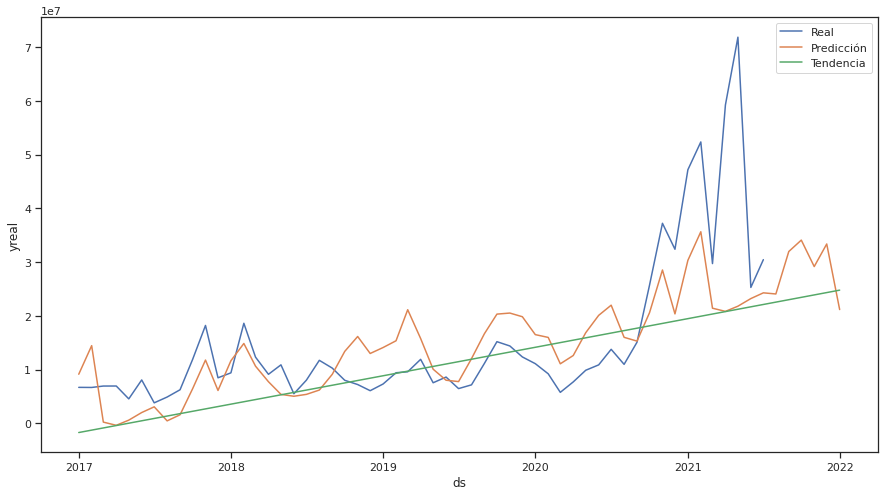

In [223]:
f, ax02 = plt.subplots(figsize=(15,8))

ax02 = sns.lineplot(x='ds', y='yreal', data=final, label='Real')
ax02 = sns.lineplot(x='ds', y='yhat', data=final, label='Predicción')
ax02 = sns.lineplot(x='ds', y='trend', data=final, label='Tendencia')

## IV. Evaluación

In [229]:
#se mide el performace sobre los valores conocidos y a través del R2
r2 = r2_score(final['yreal'][1:55], final['yhat'][1:55])
print("R cuadrado:", r2.round(2))

R cuadrado: 0.43


## V. Exportación de datos

In [225]:
final.to_csv('../data/final.csv', index=False)

## Referencias
Prophet - https://facebook.github.io/prophet/docs/quick_start.html